In [2]:
from IPython.display import HTML
import numpy as np
import urllib.request
import bs4 #this is beautiful soup
import time
import operator
import socket
import pickle
import re

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
num_pages = 3

url_base = 'https://www.indeed.com/jobs?q=Data+Scientist&start='
source = urllib.request.urlopen(url_base).read()
bs_tree = bs4.BeautifulSoup(source)

searchCount = bs_tree.find(id='searchCountPages')

In [72]:
url_base + str(0*10)

'https://www.indeed.com/jobs?q=Data+Scientist&start=0'

In [108]:
links = []

for i in range(0,20):
    source = urllib.request.urlopen(url_base + str(i*10)).read()
    bs_tree = bs4.BeautifulSoup(source)
    columnaRes = bs_tree.find(id = 'resultsCol')
    trabajos = columnaRes.findAll("div", {"class": 'unifiedRow'})
    iDtrabajos = [t.get('data-jk') for t in trabajos ]
    for j in range(0,len(iDtrabajos)):
        links.append('https://www.indeed.com/viewjob?jk=' + iDtrabajos[j])
        
    time.sleep(1)

In [109]:
len(links)

210

In [110]:
links

['https://www.indeed.com/viewjob?jk=57125117d2b4b0f6',
 'https://www.indeed.com/viewjob?jk=ed549e23e6309829',
 'https://www.indeed.com/viewjob?jk=4fbc59d736aac3c6',
 'https://www.indeed.com/viewjob?jk=64542f2ee2455370',
 'https://www.indeed.com/viewjob?jk=148b20336e7f2dab',
 'https://www.indeed.com/viewjob?jk=c98473a369f65315',
 'https://www.indeed.com/viewjob?jk=6e7b4efe3821eb15',
 'https://www.indeed.com/viewjob?jk=a6565e2068a4ae6a',
 'https://www.indeed.com/viewjob?jk=acb7925431f96873',
 'https://www.indeed.com/viewjob?jk=6c396298b99f8fc9',
 'https://www.indeed.com/viewjob?jk=b591b9aa7d26c125',
 'https://www.indeed.com/viewjob?jk=cad720e321b8978e',
 'https://www.indeed.com/viewjob?jk=e65a19b6d76a43e5',
 'https://www.indeed.com/viewjob?jk=6673ef64e0ace3dd',
 'https://www.indeed.com/viewjob?jk=0c53d6cc4b02670d',
 'https://www.indeed.com/viewjob?jk=14faf390f8303631',
 'https://www.indeed.com/viewjob?jk=080d443dff598886',
 'https://www.indeed.com/viewjob?jk=d147e71e874d603f',
 'https://

In [111]:
techs = {'sql':0, 'spark':0, 'machine learning':0, 'hadoop':0, 'python':0 , 'the':0}

In [112]:
for link in links:
    html = urllib.request.urlopen(link).read().decode('utf-8')
    html_text = re.sub("[^a-z.+3]"," ", html.lower())
    
    time.sleep(1)
    
    for key in techs.keys():
        if key in html_text:  
            techs[key] +=1

In [113]:
techs

{'sql': 119,
 'spark': 34,
 'machine learning': 138,
 'hadoop': 26,
 'python': 210,
 'the': 210}

In [122]:
series = series[0:5]

In [147]:
series

sql                 119
spark                34
machine learning    138
hadoop               26
python              210
dtype: int64

In [149]:

keys = list(techs.keys())
values = list(techs.values())

keys = keys[0:5]
values = values[0:5]

keys[0] = 'SQL'
keys[1] = 'Spark'
keys[2] = 'ML'
keys[3] = 'Hadoop'
keys[4] = 'Python'

[]

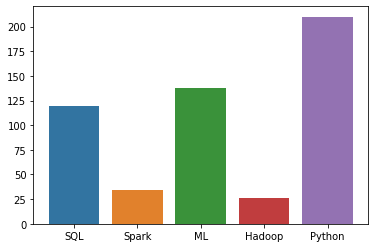

In [152]:
sns.barplot(x=keys,y=values)
plt.plot()